## [mlcourse.ai](https://mlcourse.ai) – Open Machine Learning Course 
Author: Arina Lopukhova (@erynn). Edited by [Yury Kashnitskiy](https://yorko.github.io) (@yorko) and Vadim Shestopalov (@vchulski). This material is subject to the terms and conditions of the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license. Free use is permitted for any non-commercial purpose.

The dataset has the following features:

- __ID__ - Unique number for each athlete
- __Name__ - Athlete's name
- __Sex__ - M or F
- __Age__ - Integer
- __Height__ - In centimeters
- __Weight__ - In kilograms
- __Team__ - Team name
- __NOC__ - National Olympic Committee 3-letter code
- __Games__ - Year and season
- __Year__ - Integer
- __Season__ - Summer or Winter
- __City__ - Host city
- __Sport__ - Sport
- __Event__ - Event
- __Medal__ - Gold, Silver, Bronze, or NA

In [2]:
import pandas as pd

In [3]:
# Change the path to the dataset file if needed. 
PATH = 'athlete_events.csv'

In [4]:
data = pd.read_csv(PATH)
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


__1. How old were the youngest male and female participants of the 1992 Olympics?__


- 16 and 15
- 14 and 13 
- 13 and 11
- **11 and 12**

In [31]:
res=data[data['Year']==1992]
grouped=res.groupby('Sex')
print(grouped.min()['Age'])

Sex
F    12.0
M    11.0
Name: Age, dtype: float64


__2. What was the percentage of male basketball players among all the male participants of the 2012 Olympics? Round the answer to the first decimal.__

*Hint:* drop duplicate athletes where necessary to count each athlete just once. This applies to other questions too. 

- 0.2
- 1.5 
- **2.5**
- 7.7

In [45]:
all_mp=data.loc[(data['Year']==2012)&(data['Sex']=='M'), ['ID']].drop_duplicates().count()
basc_mp=data.loc[(data['Year']==2012)&(data['Sex']=='M')&(data['Sport']=='Basketball'), ['ID']].drop_duplicates().count()
print(round(basc_mp*100/all_mp,1))

ID    2.5
dtype: float64


__3. What are the mean and standard deviation of height for female tennis players who participated in the 2000 Olympics? Round the answer to the first decimal.__

- **171.8 and 6.5**
- 179.4 and 10
- 180.7 and 6.7
- 182.4 and 9.1 

In [73]:
res=data.loc[(data['Year']==2000)&(data['Sex']=='F')&(data['Sport']=='Tennis'), ['ID', 'Height']].drop_duplicates()
mean=res['Height'].mean()
c=res['Height'].count()
res['dev']=res['Height'].apply(lambda x: (x-mean)**2)
deviation=(res['dev'].sum()/c)**(1/2)

print(round(mean, 1))
print(round(deviation, 1))

171.8
6.5


__4. Find the heaviest athlete among 2006 Olympics participants. What sport did he or she do?__


- **Judo**
- Bobsleigh 
- Skeleton
- Boxing

In [79]:
data.loc[data['Weight']==data.max()['Weight'], ['Sport']].drop_duplicates()

,Sport
23155,Judo


__5. How many times did John Aalberg participate in the Olympics held in different years?__


- 0
- 1 
- **2**
- 3 

In [81]:
data.loc[data['Name']=='John Aalberg', ['Year']].drop_duplicates().count()['Year']

2

__6. How many gold medals in tennis did the Switzerland team win at the 2008 Olympics?__


- 0
- 1 
- 2
- **3**

In [84]:
data.loc[(data['Year']==2008)&(data['Team']=='Switzerland')&(data['Medal']=='Gold')].count()['ID']

3

__7. Is it true that Spain won fewer medals than Italy at the 2016 Olympics? Do not consider NaN values in _Medal_ column.__ 


- **Yes**
- No

In [90]:
sp=data.loc[(data['Year']==2016)&(data['Team']=='Spain')&(data['Medal'].notnull())].count()['ID']
it=data.loc[(data['Year']==2016)&(data['Team']=='Italy')&(data['Medal'].notnull())].count()['ID']
print(sp<it)

True


__8. What are the most and least common age groups among the participants of the 2008 Olympics?__


- **[45-55] and [25-35) correspondingly** - предположим, что группы перепутали местами
- [45-55] and [15-25) correspondingly
- [35-45) and [25-35) correspondingly
- [45-55] and [35-45) correspondingly

In [96]:
print('[15-25): '+str(data.loc[(data['Age']>=15)&(data['Age']<25)&(data['Year']==2008)].drop_duplicates().count()['ID']))
print('[25-35): '+str(data.loc[(data['Age']>=25)&(data['Age']<35)&(data['Year']==2008)].drop_duplicates().count()['ID']))
print('[35-45): '+str(data.loc[(data['Age']>=35)&(data['Age']<45)&(data['Year']==2008)].drop_duplicates().count()['ID']))
print('[45-55]: '+str(data.loc[(data['Age']>=45)&(data['Age']<=55)&(data['Year']==2008)].drop_duplicates().count()['ID']))

[15-25): 6294
[25-35): 6367
[35-45): 790
[45-55]: 119


__9. Is it true that there were Summer Olympics held in Atlanta? Is it true that there were Winter Olympics held in Squaw Valley?__


- **Yes, Yes**
- Yes, No
- No, Yes 
- No, No 

In [109]:
if data.loc[(data['Season']=='Summer')&(data['City']=='Atlanta')].empty:
    print('No')
else:
    print('Yes')
if data.loc[(data['Season']=='Winter')&(data['City']=='Squaw Valley')].empty:
    print('No')
else:
    print('Yes')

Yes
Yes


__10. What is the absolute difference between the number of unique sports at the 1986 Olympics and 2002 Olympics?__


- 3 
- 10
- 15
- 27 

In [124]:
#будем считать, что тут подвох - в 1986 году Олимпиада не проводилась, соответственно было 0 видов спорта
a=data.loc[data['Year']==1986, ['Sport']].drop_duplicates().count()['Sport']
b=data.loc[data['Year']==2002, ['Sport']].drop_duplicates().count()['Sport']
print(abs(a-b))


15


That's it! Now go and do 30 push-ups! :)

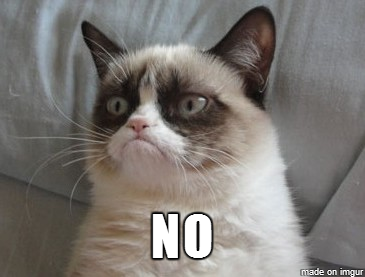